#**Unidad 2: Tarea - 3 Sistema de Ecuaciones Lineales, Regresión lineal e Interpolación**

#**EJERCICIO 3: Interpolación**
##**D**. Para el conjunto de datos:
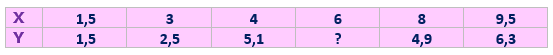

Realice un programa en Python empleando Google Colab que: 
* Ajuste a un polinomio de interpolación los datos dados, empleando cada uno de los siguientes métodos: 
 * Newton 
 * Lagrange 
 * Trazadores cúbicos 
* Con el polinomio encontrado, determine el valor en 𝑥=7 
* Haga un análisis de resultados basándose en la teoría y en los resultados obtenidos. Debe incluir referencias a la bibliografía empleada usando las normas APA. Comentarios sin referencias no serán tenidos en cuenta. 
 
* Para cada método haga una descripción teórica (las ecuaciones deberán estar escritas en LaTeX) incluyendo referencias bibliográficas empleadas siguiendo las normas APA. 
 

#**Interporlación**

**Definición**

En el subcampo matemático del análisis numérico, se denomina interpolación a la obtención de nuevos puntos partiendo del conocimiento de un conjunto discreto de puntos.

**Utilidad**

En ciertos casos el usuario conoce el valor de una función $f(x)$ en una seriede puntos$ x_1, x_2,···, x_N,$ pero no se conoce una expresión analítica de $f(x)$ que permita calcular el valor de la función para un punto arbitrario. Un ejemplo claro son las mediciones de laboratorio, donde se mide cada minuto un valor, pero se requiere el valor en otro punto que no ha sido medido. Otro ejemplo
son mediciones de temperatura en la superﬁcie de la Tierra, que se realizan en equipos o estaciones meteorológicas y se necesita calcular la temperatura en un punto cercano, pero distinto al punto de medida.

La idea de la interpolación es poder estimar f(x) para un valor de x arbitrario, a partir de la construcción de una curva o superﬁcie que une los puntos donde se han realizado las mediciones y cuyo valor si se conoce. Se asume que el punto arbitrario x se encuentra dentro de los límites de los puntos de medición, en caso contrario se llamaría extrapolación. En este página se discute exclusivamente la interpolación, aunque la idea es similar.

**Formas de interpolación**

* Interpolación lineal (figura)
* Interpolación polinómica
* Interpolación de Hermite
* Interpolación de Splines
(Estas formas son lás más importantes)

**En la práctica**

Un proceso de interpolación se realiza en dos etapas:

1. Hacer un ﬁt de los datos disponibles con una función interpolante.
2. Evaluar la función interpolante en el punto de interés x.

Este proceso en dos etapas no es necesariamente el más eﬁciente. La mayoría de algoritmos comienzan con un punto cercano $f(x_i)$, y poco a poco van aplicando correcciones más pequeñas a medida que la información de valores $f(x_i)$ más distantes son incorporadas. El procedimiento toma aproximadamente $O(N^{2})$ operaciones. Si la función tiene un comportamiento suave, la última correción será la más pequeña y puede ser utilizada para estimar un límite a rango de error.

Wikidot.com. (2020). ¿Qué es la interpolación?, de Interpolación Recuperado de http://interpolacion.wikidot.com/

#**$$DESARROLLO$$**

###**Diferencias divididas de Newton**
$$f_{n}\left ( x \right )= b_{0}+b_{1}\left ( x-x_{0} \right )+b_{2}\left ( x-x_{0} \right )\left ( x-x_{1} \right )+...+  b_{n}\left ( x-x_{0} \right )\left ( x-x_{1} \right )\left ( x-x_{2} \right )...\left ( x-x_{n-1} \right )$$
$$b_{0}=f\left ( x_{0} \right ) $$
$$b_{1}=f\left [ x_{1},x_{0} \right ]$$
$$b_{2}=f\left [ x_{2},x_{1},x_{0} \right ]$$
$$b_{n}=f\left [ x_{n},x_{n-1},...x_{1},x_{0}\right ]$$




#**Paso 1: Definimos las entradas**

In [20]:
import matplotlib.pyplot as plt             #biblioteca de python para realizar las gráficas
import numpy as np
x = [1.5, 3, 4, 8, 9.5]                     #Datos del ejercicio      
y = [1.5,2.5,5.1,4.9,6.3]                   #Datos del ejercicio
x_inter = 6                                 #valor de x donde se hará la interpolación 
# x_inter = float(input("ingrese el valor de x donde se quiere interolar:"))

#**Paso 2: Definir la función de interpolación de Newton**

In [24]:
def InterpolacionNewton (x, y, x_inter):                           #definimos la función InterpolacionNewton y las entradas vectores: (x, y, x_inter)
  n = len(x)                                                       #definimos el len x o y para generalizar 
 
  dfd = [[None for x in range(n)]  for x in range(n)]              #definimos la matriz diferencias divididas dfd, matriz con elementos vacíos
  yint = [None for x in range(n)]                                  #definimos yint para crear vector de elemtos vacios 

  for i in  range(n):                                               #range toma todos los elementos
    dfd[i][0] = y[i]                                   

  for j in range(1,n):                                              #range inicia en la pocisión 2
    for i in range(n-j):                                            #range toma todas las filas 
      dfd[i][j] = (dfd[i+1][j-1] - dfd[i][j-1]) / (x[i+j] - x[i])   #definimos el cálculo de las diferencias definidas

  yint[0]  = dfd[0][0]                                              #definimos primir elemento, vector auxiliar que nos ayudara a calcular
  xterm = 1                                                         #inicializamos el calculo de la sumatoria

  for k in range(1,n):                                              #definimos la sumatoria
    xterm = xterm * (x_inter - x[k-1])   
    y_inter = yint[k-1] + dfd[0] [k] * xterm                        
    yint[k] = y_inter                                               #Acumula los terminos del polinomio                                

  return y_inter                                                    #nuestra salida  

#**Paso 3 : Se llama la función para interpolar**

In [25]:
fxn = print(InterpolacionNewton(x, y, x_inter))                    # llamamos nuestra función de InterpolacionNewton

7.436643356643355


#**Paso 4: Se hace la gráfica del polinomio**

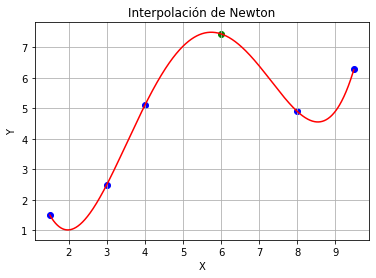

In [31]:
x_v = np.arange(min(x), max(x), 0.01)                               #llamanos la función para cada valor de x
y_v = []                                                            #creamos lista vacía para almacenar nuestra salida

for i in range(len(x_v)):                                            #llamamos a la funcion para llamar cada valor de x     
  y_grafica = InterpolacionNewton(x, y, x_v[i])                    
  y_v.append(y_grafica)                                             #por cada valor de x tenemos el valor e interpolación y_v
                                       #graficamos 
fxn = InterpolacionNewton (x, y, x_inter)

plt.scatter(x, y, color="blue")  
plt.xlabel("X")                                   
plt.ylabel("Y")
plt.title("Interpolación de Newton")
plt.grid(True)
plt.plot(x_v, y_v,'r')
plt.scatter(x_inter, fxn, color='g')


                                                     

#**Interpolación de Lagrange** 

In [32]:
import matplotlib.pyplot as plt             #biblioteca de python para realizar las gráficas
import numpy as np
x = [1.5, 3, 4, 8, 9.5]                     #Datos del ejercicio      
y = [1.5,2.5,5.1,4.9,6.3]                   #Datos del ejercicio
x_inter = 6                                 #valor de x donde se hará la interpolación 
# x_inter = float(input("ingrese el valor de x donde se quiere interolar:"))

#**Paso 2: Se define la función de interpolación de Lagrange**

In [33]:
def InterpolacionLagrange(x, y, x_inter):                           #Definimos la función InterpolacionLagrange de x, y, x_inter
  n = len(x)                                                        #Definimos el len x o y para generalizar 
  suma = 0                                                          #Definimos suma = 0

  for i in  range(n):                                               #range toma todos los elementos, i para la sumatoria
    producto = y[i]                                                 #tomamos cada uno de los elementos de nuestro vector y
    for j in  range(n):                                             #range toma todos los elementos, j para el producto
      if i !=j:                                                     # condicional para  que j sea diferente de i  
       producto = producto * (x_inter - x[j]) / (x[i] - x[j])       # calculamos producto

    suma = suma + producto                                          #definimos suma para los diferentes i
  y_inter = suma
  
  return y_inter                                                    #nuestra salida  

#**Paso 3 : Se llama la función para interpolar**

In [34]:
fxn = print(InterpolacionLagrange(x, y, x_inter))                    # llamamos nuestra función de InterpolacionLagrange(x, y, x_inter)

7.436643356643358


#**Paso 4: Se hace la gráfica**

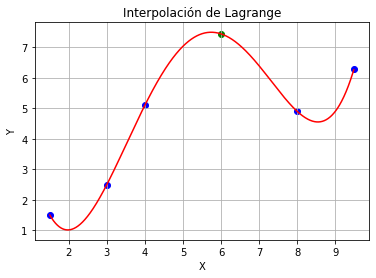

In [35]:
x_v = np.arange(min(x), max(x), 0.01)                               #llamanos la función para cada valor de x
y_v = []                                                            #creamos lista vacía para almacenar nuestra salida

for i in range(len(x_v)):                                           #llamamos a la funcion para llamar cada valor de x     
  y_grafica = InterpolacionLagrange(x, y, x_v[i])                    
  y_v.append(y_grafica)                                             #por cada valor de x tenemos el valor e interpolación y_v
                                       #graficamos 
fxn = InterpolacionLagrange (x, y, x_inter)

plt.scatter(x, y, color="blue")  
plt.xlabel("X")                                   
plt.ylabel("Y")
plt.title("Interpolación de Lagrange")
plt.grid(True)
plt.plot(x_v, y_v,'r')
plt.scatter(x_inter, fxn, color='g')

#**Interpolación con Trazadores Cúbicos**

#**Paso 1: Definimos entradas**

In [39]:
import numpy as np
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt                                                             #cargamos bibliotecas necesarias.

x = [1.5, 3, 4, 8, 9.5]                                                                     #Datos del ejercicio      
y = [1.5,2.5,5.1,4.9,6.3]                                                                   #Datos del ejercicio
x_inter = 6                                                                                 #valor de x donde se hará la interpolación 
n = len(x)

h = np.zeros([n- 1])                                                                        #matrices y vectores para ir almacenando datos interiores 
A = np.zeros([n- 2, n- 2]); B = np.zeros([n - 2]); s = np.zeros([n])
a = np.zeros([n- 1]); b = np.zeros([n - 1]); c = np.zeros([n - 1]); d = np.zeros([n - 1])


#**Paso 2: Definir el método de interpolación por trazadores cúbicos**

In [58]:
def InterpolacionTrazados(x, y, x_inter, n, h, A, a):                                   #Definimos la función InterpolacionTrazados (x, y, x_inter, n, h, A, a)
  if n<3:
    T=[]

  for i in range(n-1):
      h[i]=x[i+1]-x[i]
  A[0,0]=2*(h[0]+h[1])                                                             #Construimos el sistema
  A[0,1]=h[1]
  B[0]=6*((y[2]-y[1])/h[1]-(y[1]-y[0])/h[0])
  for i in range(1,n-3):
      A[i,i-1]= h[i]
      A[i,i] =2*(h[i +1])
      A[i,i+1] = h[i +1]
      B[i] = 6*((y[i+2] - y[i +1]) / h[i+1] - (y[i+1] - y[i]) / h[i])
  A[n- 3, n-4] = h[n-3]
  A[n- 3, n - 3] = 2 * (h[n - 3] + h[n - 2])
  B[n- 3] = 6 *((y[n -1] - y[n - 2]) / h[n - 2] - (y[n- 2] - y[n- 3]) / h[n -3])
  r=np.linalg.solve(A, B)                                                               #Resolvemos el sistema

  for i in range(1,n-1):
    S[i]=r[i-1]
  S[0] = 0
  S[n-1] = 0

  for i in range(n - 1):
      a[i] = (S[i + 1] - S[i]) / (6 * h[i])
      b[i] = S[i] / 2
      c[i] = (y[i + 1] - y[i]) / h[i] - (2 * h[i] * S[i] + h[i] * S[i + 1]) / 6
      d[i] = y[i]

  try:
    if len(x_inter) == 0:                                                                #Identificamos si es un vector 
        pass
  
  except TypeError:
       x_inter = [x_inter]                                                               #Asignamos el punto a evaluar en el vector 
  
  if len(x_inter) == 0:                                                                  #Construimos el vector 
      t = symbol('t')
      T = []
      for i in range(n - 1):
          p=expand(a[i]*(t -x[i])**3 +b[i]*(t-x[i])**2+c[i]*(t-x[i])+d[i])
          T=T+[p]

  else:                                                                                   #Evaluamos el trazador 
      m = len(x_inter)
      y_inter = np.zeros([m])
      for k in range(m):
          t = x_inter[k]
          for i in range(n - 1):
              if t >= x[i] and t <= x[i + 1]:
                   y_inter[k] = a[i] * (t - x[i]) ** 3 + b[i] * (t - x[i]) ** 2 + c[i] * (t - x[i]) + d[i]

          if m > 2:
             k = m - 1
             i = n - 2
             y_inter[k] = a[i] * (t - x[i]) ** 3 + b[i] * (t - x[i]) ** 2 + c[i] * (t - x[i]) + d[i]

  return y_inter 


#**Paso 3: Se llama la función para interpolar**

In [ ]:
fxn = print(InterpolacionTrazados(x, y, x_inter, n, h, A, a))                           # llamamos nuestra función InterpolacionTrazados(x, y, x_inter, n, h, A, a)

#**Paso 4: Se hace la gráfica el polinomio**

In [62]:
x_v = np.arange(min(x), max(x), 0.01)                               #llamanos la función para cada valor de x

y_v = []                                                            #creamos lista vacía para almacenar nuestra salida

for i in range(len(x_v)):                                           #llamamos a la funcion para llamar cada valor de x     
  y_grafica = InterpolacionTrazados(x, y, x_v[i],n ,h, A, a)                    
  y_v.append(y_grafica)                                             #por cada valor de x tenemos el valor e interpolación y_v
                                       #graficamos 
fxn = InterpolacionTrazados(x, y, x_inter, n, h, A, a)

plt.scatter(x, y, color="blue")  
plt.xlabel("X")                                   
plt.ylabel("Y")
plt.title("Interpolación de Trazados cúbicos")
plt.grid(True)
plt.plot(x_v, y_v,'r')
plt.scatter(x_inter, fxn, color='g')

NameError: ignored